# Exploring Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\KEVIN ASUS
[nltk_data]     516\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\KEVIN ASUS
[nltk_data]     516\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Let's analyze Resume.csv (CV dataset from Kaggle)

In [2]:
df = pd.read_csv('reed_uk.csv')
df

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
0,catering jobs,Chudleigh,Haulfryn Group,uk,reed,Apply now New opportunity not to be missed! H...,NaN,Commis Chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",Devon
1,law jobs,Swindon,Reed,uk,reed,Apply now This role requires an experienced s...,NaN,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",Wiltshire
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,uk,reed,Apply now Job Title: Warehouse personLocation...,NaN,Warehouse Person,"Permanent, full-time",2/27/2018,Salary not specified,East Anglia
3,law jobs,Hurstpierpoint,Castles Solicitors,uk,reed,Apply now Castles Solicitors are looking for ...,Required skills Admin Case Management Corresp...,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex
4,factory jobs,Hertfordshire,Marketplace Group,uk,reed,Apply now International Pharmaceutical Manufa...,NaN,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,"£37,000 - £45,000 per annum",South East England
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,science jobs,Oxfordshire,Hays Specialist Recruitment Limited,uk,reed,Apply now Scientist - Cell Based Assays - Neu...,NaN,Scientist In vitro Cell-Free & Cell Based Assays,"Contract, full-time",3/7/2018,£22.00 - £26.00 per hour,South East England
49996,graduate training internships jobs,Northampton,The Graduate,uk,reed,Apply now Our client is looking for high achi...,Required skills Blue Chip Communication Skill...,Graduate Training Scheme - Recruitment,"Permanent, full-time",3/9/2018,"£18,000 - £21,000 per annum",Northamptonshire
49997,strategy consultancy jobs,City of London,Capgemini Consulting,uk,reed,Apply on employer's website Who youâ€™ll be w...,NaN,"Management Consultant - Retail Buying, Merchan...","Permanent, full-time",2/17/2018,Competitive salary,London
49998,purchasing jobs,Egham,Concept Human Solutions,uk,reed,"Apply now UNDERSTANDING, SERVICE, TRUST3 Word...",Required skills Procurement AV,AV Procurement Assistant,"Permanent, full-time",3/6/2018,"£27,500 - £30,000 per annum, negotiable, OTE",Surrey


In [3]:
to_drop = ['city', 'company_name', 'geo', 'job_board', 'job_description', 'job_title', 'job_type', 'post_date', 'salary_offered', 'state']
df.drop(to_drop, inplace=True, axis=1)
df

,category,job_requirements
0,catering jobs,NaN
1,law jobs,NaN
2,factory jobs,NaN
3,law jobs,Required skills Admin Case Management Corresp...
4,factory jobs,NaN
...,...,...
49995,science jobs,NaN
49996,graduate training internships jobs,Required skills Blue Chip Communication Skill...
49997,strategy consultancy jobs,NaN
49998,purchasing jobs,Required skills Procurement AV


In [4]:
df.dropna(inplace=True)

In [5]:
df

,category,job_requirements
3,law jobs,Required skills Admin Case Management Corresp...
7,motoring automotive jobs,Required skills Accident Paint Repair Spray P...
9,law jobs,Required skills Diary Management Legal Secret...
10,motoring automotive jobs,Required skills Car Dealership Sales Sales Ex...
15,catering jobs,Required skills chef line chef commis chef co...
...,...,...
49987,purchasing jobs,Required skills Logistics driving licence ope...
49992,purchasing jobs,Required skills Buying Procurement Strategic ...
49996,graduate training internships jobs,Required skills Blue Chip Communication Skill...
49998,purchasing jobs,Required skills Procurement AV


In [6]:
STEMMER = nltk.stem.porter.PorterStemmer()
def preprocess(txt):
    # lower casing all char
    txt = txt.lower()
    
    # filtering
    txt = re.sub('[%s]' % re.escape("""!"$%&'()*,-./:;<=>?@[\]^_`{|}~"""), ' ', txt)  # remove punctuations except # and + for word like C++ or C#
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace

    # remove stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "required", "be", "because", "skills", "skill", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]
    result = []
    words = txt.split()
    for w in words:
        if w not in stopwords:
            result.append(w)

    # Stemming
    txt = [STEMMER.stem(w) for w in result]

    return ' '.join(txt)

def removejobs(wrd):
    wrd = wrd.lower()
    wrd = re.sub(' ', '', wrd)  # remove (-)
    wrd = re.sub('jobs', '', wrd)
    
    return wrd

In [7]:
df2= df.copy() #create new copy of df for experiment

In [8]:
df2['Category'] = df2['category'].apply(lambda x: removejobs(x))
df2['Requirements'] = df2['job_requirements'].apply(lambda w: preprocess(w))
# drop original text column
df2.pop('category')
df2.pop('job_requirements')
df2

,Category,Requirements
3,law,admin case manag correspond legal solicitor
7,motoringautomotive,accid paint repair spray paint
9,law,diari manag legal secretari type
10,motoringautomotive,car dealership sale sale execut sale team
15,catering,chef line chef commi chef cook kitchen staff g...
...,...,...
49987,purchasing,logist drive licenc oper
49992,purchasing,buy procur strateg sourc cip
49996,graduatetraininginternships,blue chip commun graduat level
49998,purchasing,procur av


In [9]:
categories = np.sort(df2['Category'].unique()) #List of all categories array form
df_categories = [df2[df2['Category'] == category].loc[:, ['Requirements', 'Category']] for category in categories] #Create new df with interchanging cols
print('Categories: ', categories)
df_categories[1]

Categories:  ['accountancy' 'accountancyqualified' 'adminsecretarialpa'
 'apprenticeships' 'banking' 'catering' 'charity' 'constructionproperty'
 'customerservice' 'education' 'energy' 'engineering' 'estateagent'
 'factory' 'finance' 'fmcg' 'generalinsurance'
 'graduatetraininginternships' 'health' 'hr' 'it' 'law' 'leisuretourism'
 'logistics' 'marketing' 'mediadigitalcreative' 'motoringautomotive'
 'other' 'purchasing' 'recruitmentconsultancy' 'retail' 'sales' 'science'
 'securitysafety' 'socialcare' 'strategyconsultancy' 'training']


,Requirements,Category
6074,complianc corpor tax intern tax pay vat,accountancyqualified
6089,manag process improv sap share servic transform,accountancyqualified
6093,audit senior supervisor manag london financi s...,accountancyqualified
6103,acca account account audit manag,accountancyqualified
6134,aca acca busi advisori financi report uk gaap,accountancyqualified
...,...,...
38907,financ director technolog treasuri fund rais,accountancyqualified
38915,analysi group account financ busi partner mana...,accountancyqualified
38922,corpor financ m analysi merger,accountancyqualified
38931,p11d person tax person tax senior tax job mark...,accountancyqualified


## Let's see common words of each categories seen from word frequency

In [10]:
def wordfreq(df2):
    count = df2['Requirements'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

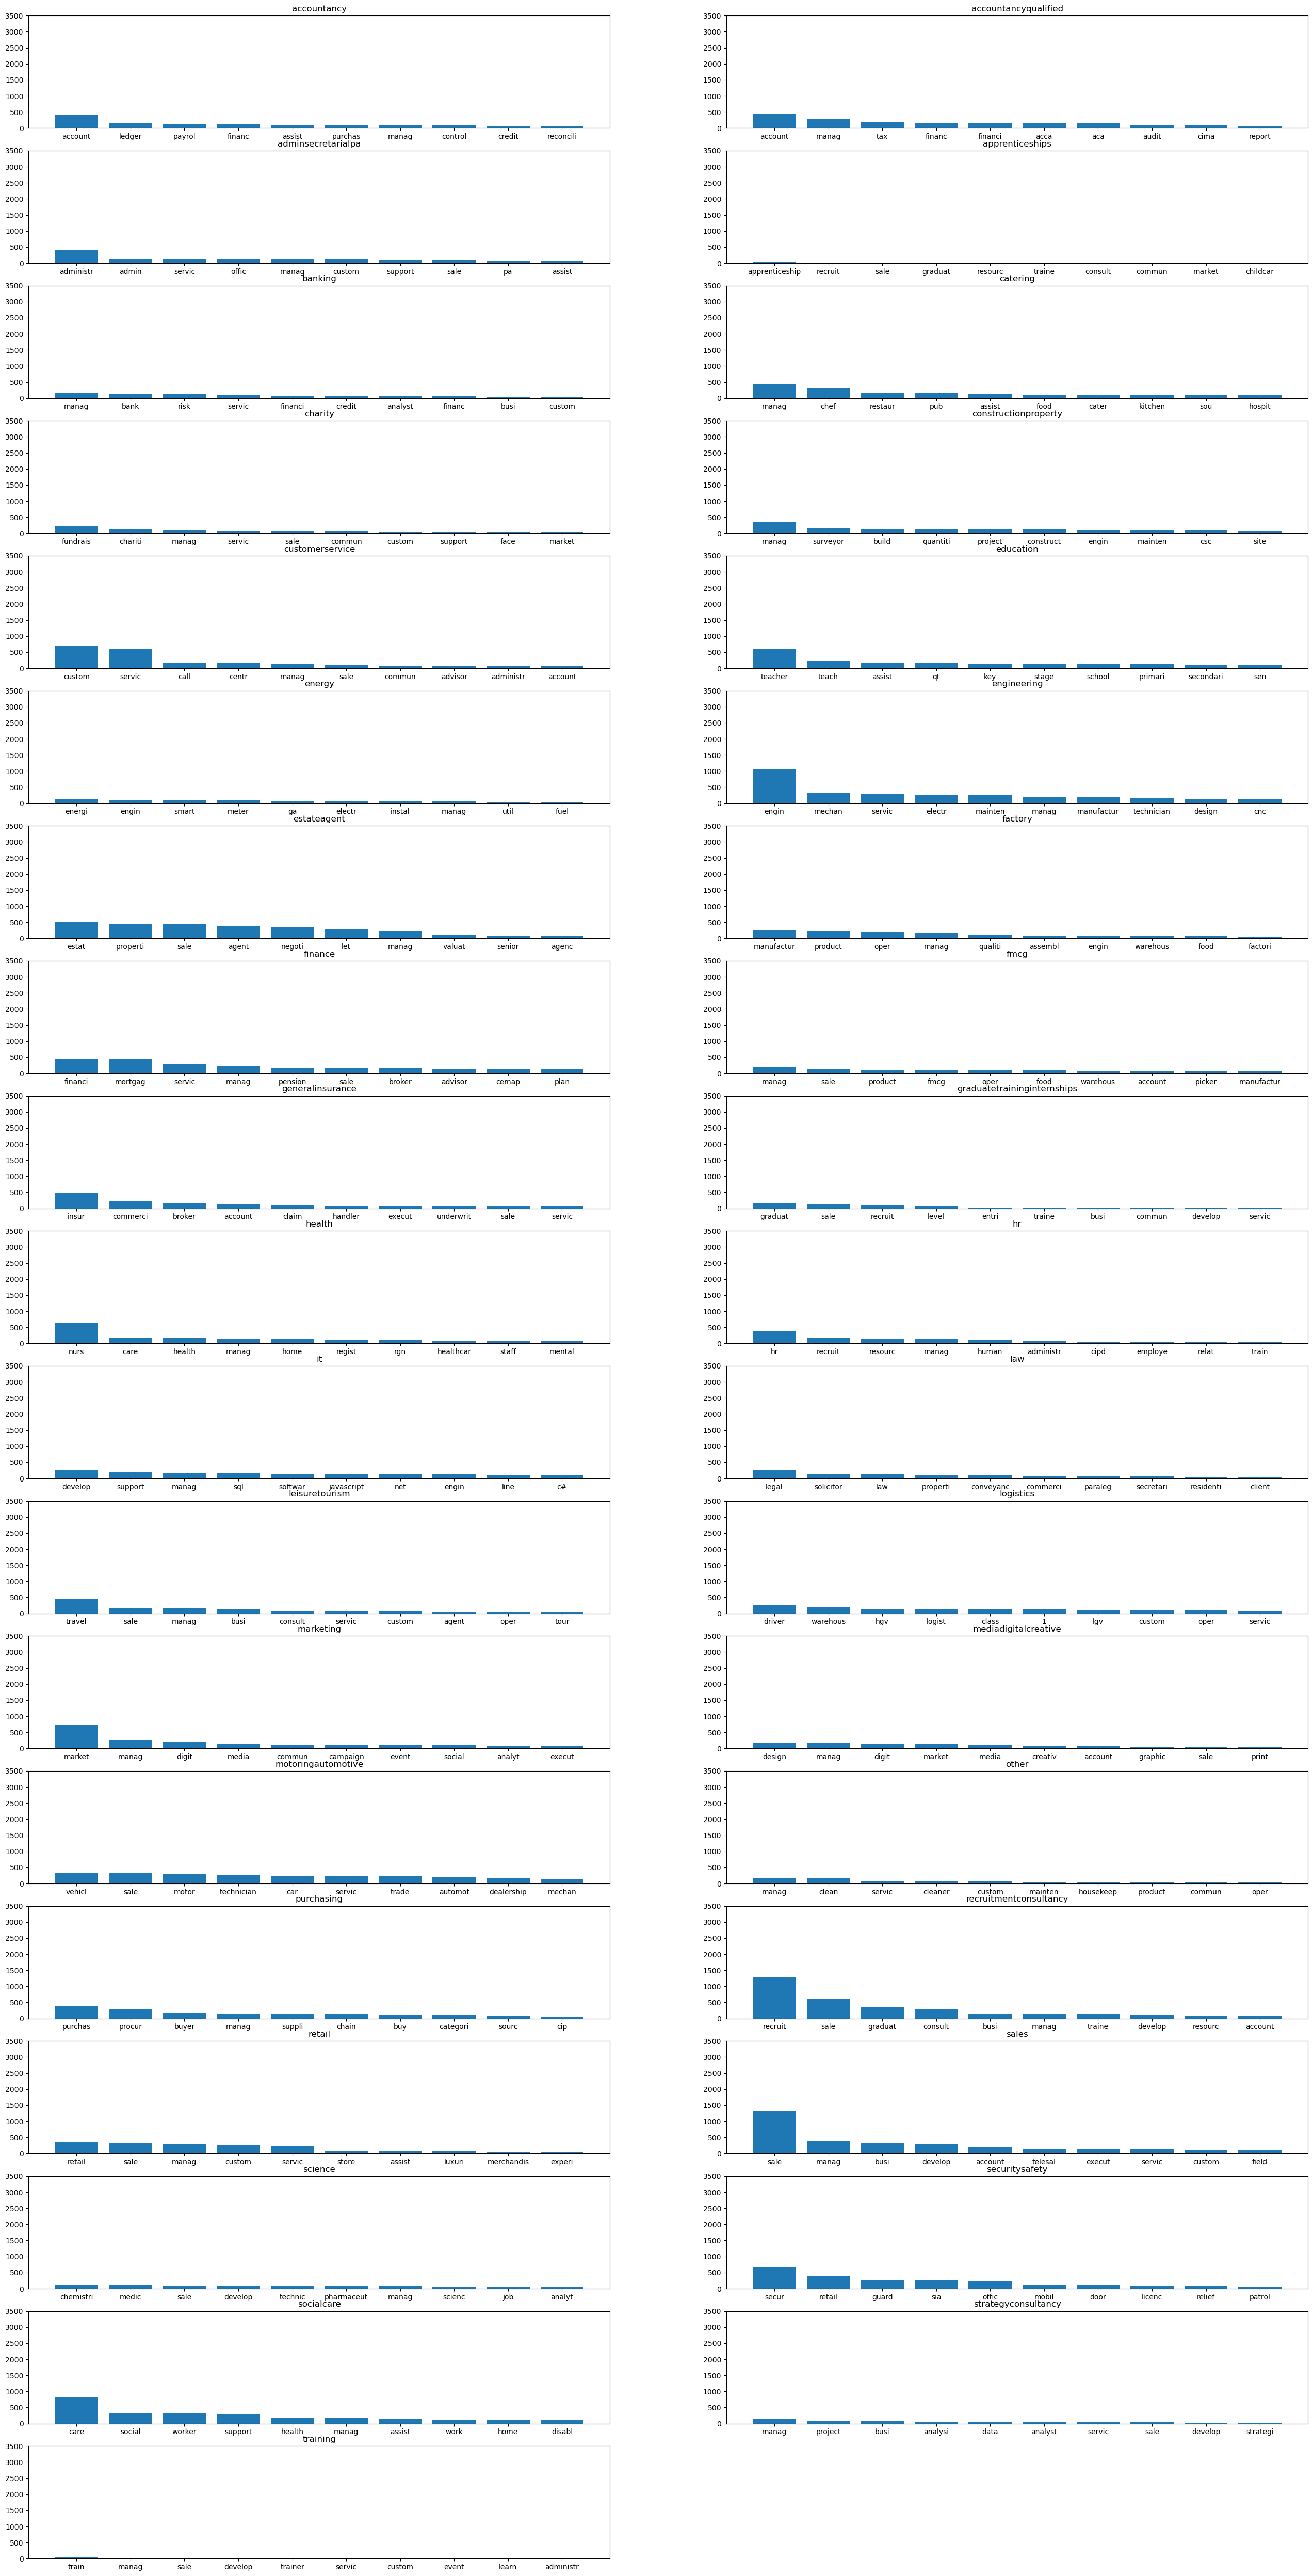

In [11]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(19, 2, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

In [12]:
df2.to_csv('CleanResume(2).csv', index=False)

After saving the cleaned resume, I try to shuffle it again (using Ms.Excel) for better distribution

# Bulding Model

In [13]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [14]:
with open("CleanShuffledResume(2).csv", 'r') as csvfile: #the csv file is not using the CP1252 encoding so I have to specify, 
                                                            #let's try to specify with the commonn encoding='utf8'
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

Category,Requirements

Each data point looks like this:

estateagent,valuat valuer view senior let negoti let manag let negoti let consult properti administr



In [15]:
def parse_data_from_file(filename): # Extracts sentences and labels from a CSV file and returns sentences, labels
    sentences = []
    labels = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for row in reader:
            labels.append(row[0])
            sentences.append(row[1])

    return sentences, labels

In [16]:
sentences, labels = parse_data_from_file("CleanShuffledResume(2).csv")

print(f"There are {len(sentences)} sentences in the dataset.\n")
print(f"First sentence has {len(sentences[0].split())} words.\n")
print(f"There are {len(labels)} labels in the dataset.\n")
print(f"The first 5 labels are {labels[:5]}, the dataset has been shuffled!")

There are 20548 sentences in the dataset.

First sentence has 14 words.

There are 20548 labels in the dataset.

The first 5 labels are ['estateagent', 'accountancy', 'retail', 'estateagent', 'recruitmentconsultancy'], the dataset has been shuffled!


## Some variable for easy adjustement

In [17]:
MAXLEN = 25
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .78

## Let's split the lists of sentences and labels into training and validation

In [18]:
def train_val_split(sentences, labels, training_split):
    # Compute the number of sentences that will be used for training
    train_size = int(len(labels)*training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[:train_size]
    train_labels = labels[:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]
    
    return train_sentences, validation_sentences, train_labels, validation_labels

In [19]:
train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, TRAINING_SPLIT)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 16027 sentences for training.

There are 16027 labels for training.

There are 4521 sentences for validation.

There are 4521 labels for validation.


## Tokenize

In [20]:
def fit_tokenizer(train_sentences, oov_token):
    tokenizer = Tokenizer(oov_token=oov_token)
    tokenizer.fit_on_texts(train_sentences) # Fit the tokenizer to the training sentences

    return tokenizer

In [21]:
tokenizer = fit_tokenizer(train_sentences, OOV_TOKEN)
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

print(f"Vocabulary contains {VOCAB_SIZE} words")
print("with <OOV> token included" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 5605 words
with <OOV> token included


In [22]:
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences) # Convert sentence to sequence
    padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding=padding)
    
    return padded_sequences

In [23]:
train_padded_seq = seq_and_pad(train_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(val_sentences, tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {train_padded_seq.shape}")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (16027, 25)
Padded validation sequences have shape: (4521, 25)


In [24]:
def tokenize_labels(all_labels, split_labels):
    label_tokenizer = Tokenizer()
    label_tokenizer.fit_on_texts(all_labels)
    label_word_index = label_tokenizer.word_index
    label_seq = label_tokenizer.texts_to_sequences(split_labels) # Save the sequences
    label_seq_np = np.array(label_seq) - 1 # Keras usually expects the labels to start at 0
                                            # So, we subtract each labelling by 1 since tokenizer is start at 1
    
    return label_seq_np, label_word_index

In [25]:
# Test your function
train_label_seq, label_word_index = tokenize_labels(labels, train_labels)
val_label_seq, label_word_index = tokenize_labels(labels, val_labels)

print(f"Label vocabulary contains {len(label_word_index)} words")
print(f"First 10 labels of the training set should look like this:\n{train_label_seq[:10]}\n")
print(f"First 10 labels of the validation set should look like this:\n{val_label_seq[:10]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}")
print(f"Tokenized labels of the validation set have shape: {val_label_seq.shape}")

Label vocabulary contains 37 words
First 10 labels of the training set should look like this:
[[13]
 [17]
 [18]
 [13]
 [ 2]
 [21]
 [14]
 [23]
 [ 3]
 [13]]

First 10 labels of the validation set should look like this:
[[12]
 [21]
 [ 1]
 [ 9]
 [17]
 [ 9]
 [ 8]
 [ 0]
 [ 8]
 [ 9]]

Tokenized labels of the training set have shape: (16027, 1)
Tokenized labels of the validation set have shape: (4521, 1)


## Text classification model

In [26]:
EMBEDDING_DIM = 40

In [27]:
tf.random.set_seed(123)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE+1, output_dim=EMBEDDING_DIM, input_length=MAXLEN),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(37, activation='softmax')])

model.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [28]:
history = model.fit(train_padded_seq, train_label_seq, batch_size=70, epochs=20, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/20
229/229 [==============================] - 10s 27ms/step - loss: 3.1640 - accuracy: 0.1876 - val_loss: 3.3934 - val_accuracy: 0.0776
Epoch 2/20
229/229 [==============================] - 5s 22ms/step - loss: 1.8802 - accuracy: 0.5173 - val_loss: 1.9724 - val_accuracy: 0.4705
Epoch 3/20
229/229 [==============================] - 4s 18ms/step - loss: 1.4536 - accuracy: 0.6362 - val_loss: 1.4926 - val_accuracy: 0.6262
Epoch 4/20
229/229 [==============================] - 4s 18ms/step - loss: 1.2388 - accuracy: 0.6891 - val_loss: 1.4350 - val_accuracy: 0.6439
Epoch 5/20
229/229 [==============================] - 4s 18ms/step - loss: 1.1061 - accuracy: 0.7212 - val_loss: 1.3330 - val_accuracy: 0.6751
Epoch 6/20
229/229 [==============================] - 4s 18ms/step - loss: 1.0231 - accuracy: 0.7439 - val_loss: 1.3970 - val_accuracy: 0.6611
Epoch 7/20
229/229 [==============================] - 4s 20ms/step - loss: 0.9538 - accuracy: 0.7618 - val_loss: 1.2697 - val_accuracy: 0.691

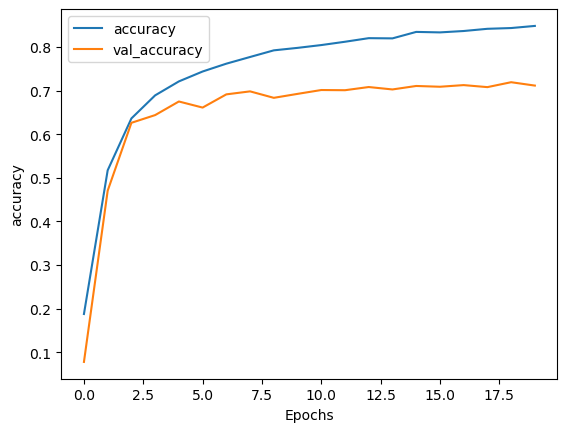

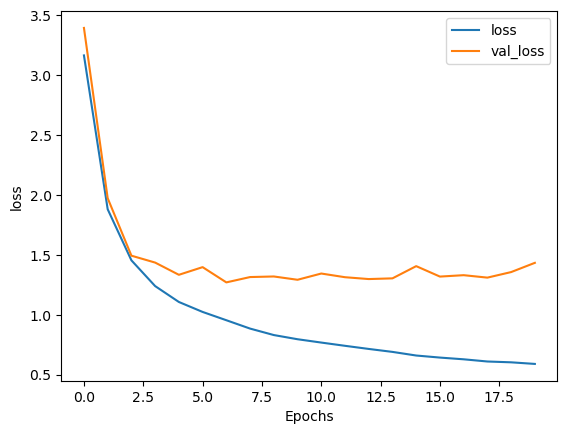

In [29]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")